In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from typing import Iterable
import pickle

In [2]:
file_path = "../data/dataset_disruption_characterization.pickle"
if os.path.exists(file_path):
    with open(file_path, "rb") as f:
        dataset = pickle.load(f)
else:
    print("File not found.")

data_raw_path = "../data/DISR_data"
def load_raw_signal(shot):
    return pd.read_parquet(os.path.join(data_raw_path, f"JET_DATAno{shot}.parquet"))

In [3]:
def walk(struct, prefix="", append="  "):
    # simple function to inspect dict without printing all contents
    for key, item in struct.items():
        if not isinstance(item, dict):
            if isinstance(item, np.ndarray):
                postfix = f"{item.shape}"
            elif isinstance(item, Iterable):
                postfix = f"({len(item)})"
            else:
                postfix = ""

            print(f"{prefix}{key}: var <{type(item).__name__}> {postfix}")
        else:
            print(f"{prefix}{key}\n{prefix}" + "{")
            walk(item, prefix=prefix+append, append=append)
            print(f"{prefix}" + "}")

In [4]:
# get all shot nos
all_shots = [int(os.path.basename(x.split(".parquet")[0].split("JET_DATAno")[1]))
             for x in glob.glob(os.path.join(data_raw_path, f"JET_DATAno*.parquet"))]
if len(all_shots) < 156:  # check if all data is there
    raise ValueError(f"Not all shots found in path /{data_raw_path}/; found only {len(all_shots)} out of 156")

## Create dataset

In [5]:
dataset[0]["x"]["columns"]

['IPLA', 'IPref', 'ECEcore', 'SSXcore', 'LI', 'Q95', 'ZMAG', 'Vloop']

In [6]:
df_data = pd.DataFrame()

# Loop through each entry in the dataset
for i, entry in enumerate(dataset):
    # Extract data and label from the current entry
    d = entry['x']
    label = entry['y']

    # Create a DataFrame for the current entry
    df = pd.DataFrame(d['data'], columns=d['columns'])   
    df['Frame'] = range(0, 20)
    df['Label'] = label
    df['Time'] = d['time']
    df["Distance"] = df["IPLA"] - df["IPref"]
    df['Shot'] = entry['metadata']['shot']

    # Append the current DataFrame to the main DataFrame
    df_data = pd.concat([df_data, df], ignore_index=True)


df_data = df_data.dropna()
#display every row
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#display(df_data)

In [7]:
df_data.head(21)

,IPLA,IPref,ECEcore,SSXcore,LI,Q95,ZMAG,Vloop,Frame,Label,Time,Distance,Shot
0,1989456.750,1999500.0,1740.929077,0.008850,1.191489,3.874169,0.303880,-0.519496,0,0,10.361,-10043.250,81206
1,1989606.250,1999500.0,1744.737427,0.008850,1.191489,3.874169,0.303880,-0.758418,1,0,10.362,-9893.750,81206
2,1988484.000,1999500.0,1756.823730,0.008698,1.191489,3.874169,0.303880,-1.037327,2,0,10.363,-11016.000,81206
3,1989329.625,1999500.0,1756.823730,0.008469,1.191489,3.874169,0.303880,-0.758418,3,0,10.364,-10170.375,81206
4,1990532.250,1999500.0,1746.057251,0.008850,1.191489,3.874169,0.303880,0.237256,4,0,10.365,-8967.750,81206
5,1988951.375,1999500.0,1755.573242,0.008774,1.191489,3.874169,0.303880,-1.396209,5,0,10.366,-10548.625,81206
6,1989445.625,1999500.0,1755.573242,0.008469,1.191489,3.874169,0.303880,-0.639124,6,0,10.367,-10054.375,81206
7,1990167.375,1999500.0,1761.411133,0.008850,1.191489,3.874169,0.303880,-0.400202,7,0,10.368,-9332.625,81206
8,1989791.500,1999500.0,1763.725098,0.008926,1.191489,3.874169,0.303880,-0.798405,8,0,10.369,-9708.500,81206
9,1990491.875,1999500.0,1765.569336,0.008774,1.191489,3.874169,0.303880,-1.197274,9,0,10.370,-9008.125,81206


### Minor event counting

In [8]:
#make a for loop per shot
shots = df_data['Shot'].unique()
#add a column to the dataframe called order
df_data['Order'] = 0
for shot in shots :
    #take frame 0
    df_shot = df_data[df_data['Shot'] == shot]
    df_shot = df_shot[df_shot['Frame'] == 0]
    #take the time of the frame 0
    time = df_shot['Time'].values

    for l in range (len(time)):
        #take the index in the data of the smallest time
        index = df_shot['Time'].idxmin()
        #set the order column of the index to 1
        df_data.loc[index, 'Order'] = l
        #set the order to the next 18 rows
        for i in range(1, 20):
            df_data.loc[index+i, 'Order'] = l
        #drop the value of the time array so the next smallest value will be taken
        df_shot = df_shot.drop(index)

def process_shot_group(group):
    minor_event_tracker = 0
    minor_events = []
    #sort by order column
    group = group.sort_values(by=['Order'])

    for i in group.index[::20]:  # Iterate over the index, stepping by 20
        minor_events.extend([minor_event_tracker] * 20)


        if group.at[i, 'Label'] == 1:  # Check the label at every 20th row
            minor_event_tracker += 1
        elif group.at[i, 'Label'] == 2:
            minor_event_tracker +=5

    group['Minor events that occurred yet'] = minor_events
    return group

# Apply the function to each 'Shot' group
grouped_df = df_data.groupby('Shot').apply(process_shot_group).reset_index(drop=True)
# Display the result
grouped_df = grouped_df.groupby(by=['Shot', 'Order'], group_keys=False).apply(lambda x: x.sort_values(by=['Frame'])).reset_index(drop=True)

grouped_df['Label'] = grouped_df['Label'].astype(float)
grouped_df[6560:6600]
df_data = grouped_df


In [9]:
#take the first 20 rows
df_data_sliced = df_data.iloc[0:20]
df_data_sliced = df_data_sliced.iloc[5:20]

### For loop to get parameters per window per group

In [11]:
#get the distance from the each row
#create a dictionnary with a distance column
dict_windows = {'distances' :[],'distance_mean':[],'minor_events':[],'ECEcore' :[],'ECEcore_mean':[],'ECEcore_dx1':[],'ECEcore_dx2':[], 'ZMAG':[],'ZMAG_mean' :[],'LI' :[], 'LI_mean' :[],'IPLA' :[], 'shot':[], 'label':[],'window' :[], 'IPLA_dx1' :[], 'IPLA_dx2' : [], 'IPLA_dx3' :[], 'IPLA_ddx' : [], 'fft_low': [],'IPLA_1' : [], 'IPLA_2' : [], 'IPLA_3' :[], 'IPLA_4' : [],'IPLA_mean':[],'time_window' : [], 'Vloop_1' : [],'Vloop_2' : [], 'Vloop_3' :[], 'Vloop_4' :[]}

df_data_group = df_data.groupby('Label')
#df_data_group_0 = df_data_group.get_group(0)

distances = []
IPLA = []
derivative_1 = []
derivative_2 = []
derivative_3 = []
double_derivatives = []
window_counter = 0
fft_results = []
fs = 1000  # Sampling frequency in Hz
dt = 1/fs  # Time step in seconds

for j in range(3):

    distances_j = []
    distances_mean_j = []

    IPLA_j = []
    IPLA_1_j = []
    IPLA_2_j = []
    IPLA_3_j = []
    IPLA_4_j = []
    IPLA_mean_j = []

    Vloop_1_j = []
    Vloop_2_j = []
    Vloop_3_j = []
    Vloop_4_j = []

    ECEcore_j = []
    ECEcore_mean_j = []
    ECEcore_dx1_j = []
    ECEcore_dx2_j = []

    ZMAG_j = []
    ZMAG_mean_j = []

    LI_j = []
    LI_mean_j = []

    minor_events_j = []

    fft_results_j = []

    derivative_1_j= []
    derivative_2_j = []
    derivative_3_j = []
    IPLA_ddxs_j = []

    shots_j = []

    window_j =[]
    time_window_j = []

    df_data_group_j = df_data_group.get_group(j)

    for i in range(0,df_data_group_j.shape[0],20):

        #take the first 20 rows
        df_data_sliced = df_data_group_j.iloc[i:i+20]
        df_data_sliced = df_data_sliced.iloc[5:20]

        df_data_distance = df_data_sliced['Distance']
        df_data_distance = df_data_distance.to_numpy().astype(np.float64)

        df_data_current = df_data_sliced['IPLA']
        df_data_current = df_data_current.to_numpy()

        #get the distance from the each row
        distances_j.append(df_data_distance)
        distances_mean_j.append(np.mean(df_data_distance))

        IPLA_j.append(df_data_current)
        #A CHANGER POUR LES VRAIES WINDOWS
        IPLA_1_j.append(df_data_current[14])
        IPLA_2_j.append(df_data_current[6])
        IPLA_3_j.append(df_data_current[7])
        IPLA_4_j.append(df_data_current[5])
        IPLA_mean_j.append(np.mean(df_data_current))


        df_mean = np.mean(df_data_distance)

        #take the fft of the current
        fft_res = np.fft.fft(df_data_current)
        fft_res = np.abs(np.array(fft_res))
        fft_results_j.append(fft_res[0])
        
        df_data_ECEcore = df_data_sliced['ECEcore'].to_numpy()
        ECEcore_j.append(df_data_ECEcore)
        ECEcore_mean_j.append(np.mean(ECEcore_j))
        df_data_ece_derivative = np.diff(df_data_ECEcore)[-2:]

        ECEcore_dx1_j.append(df_data_ece_derivative[0])
        ECEcore_dx2_j.append(df_data_ece_derivative[1])

        ZMAG_j.append(df_data_sliced['ZMAG'].to_numpy())
        ZMAG_mean_j.append(np.mean(ZMAG_j))

        minor_events_j.append(np.mean(df_data_sliced['Minor events that occurred yet'].to_numpy()))

        LI_j.append(df_data_sliced['LI'].to_numpy())
        LI_mean_j.append(np.mean(LI_j))


        Vloop_1_j.append(df_data_sliced['Vloop'].to_numpy()[14])
        Vloop_2_j.append((df_data_sliced['Vloop'].to_numpy()[13]+df_data_sliced['Vloop'].to_numpy()[11]+df_data_sliced['Vloop'].to_numpy()[10])/3)
        Vloop_3_j.append((df_data_sliced['Vloop'].to_numpy()[5]+df_data_sliced['Vloop'].to_numpy()[6]+df_data_sliced['Vloop'].to_numpy()[7]+df_data_sliced['Vloop'].to_numpy()[8])/4)
        Vloop_4_j.append(df_data_sliced['Vloop'].to_numpy()[2])




        #take the derivative of the distance
        df_data_derivative = np.diff(df_data_current)[-3:]
        derivative_1_j.append(df_data_derivative[0])
        derivative_2_j.append(df_data_derivative[1])
        derivative_3_j.append(df_data_derivative[2])


        #take the double derivative of the distance
        df_data_IPLA_ddx = np.diff(df_data_derivative)[-1:]
        IPLA_ddxs_j.append(df_data_IPLA_ddx)

        #take the shot number
        df_data_shot = df_data_sliced['Shot']
        df_data_shot = df_data_shot.to_numpy()
        shots_j.append(df_data_shot[0])

        window_counter += 1
        window_j.append(window_counter)
        time_window_j.append(df_data_sliced['Time'].to_numpy()[0])


    distances_j = np.array(distances_j)
    distances.append(distances_j)

    fft_results_j = np.array(fft_results_j)
    fft_results.append(fft_results_j)

    IPLA_j = np.array(IPLA_j)
    IPLA.append(IPLA_j)

    derivative_1_j = np.array(derivative_1_j)
    derivative_1.append(derivative_1_j)

    derivative_2_j = np.array(derivative_2_j)
    derivative_2.append(derivative_2_j)

    derivative_3_j = np.array(derivative_3_j)
    derivative_3.append(derivative_3_j)


    #double_derivatives_j = np.array(double_derivatives_j)
    double_derivatives.append(IPLA_ddxs_j)

    dict_windows['distances'].append(distances_j)
    dict_windows['distance_mean'].append(distances_mean_j)

    dict_windows['fft_low'].append(fft_results_j)

    dict_windows['IPLA'].append(IPLA_j)
    dict_windows['IPLA_1'].append(IPLA_1_j)
    dict_windows['IPLA_2'].append(IPLA_2_j)
    dict_windows['IPLA_3'].append(IPLA_3_j)
    dict_windows['IPLA_4'].append(IPLA_4_j)
    dict_windows['IPLA_mean'].append(IPLA_mean_j)

    dict_windows['Vloop_1'].append(Vloop_1_j)
    dict_windows['Vloop_2'].append(Vloop_2_j)
    dict_windows['Vloop_3'].append(Vloop_3_j)
    dict_windows['Vloop_4'].append(Vloop_4_j)

    dict_windows['ECEcore'].append(ECEcore_j)
    dict_windows['ECEcore_mean'].append(ECEcore_mean_j)
    dict_windows['ECEcore_dx1'].append(ECEcore_dx1_j)
    dict_windows['ECEcore_dx2'].append(ECEcore_dx2_j)
    
    dict_windows['ZMAG'].append(ZMAG_j)
    dict_windows['ZMAG_mean'].append(ZMAG_mean_j)

    dict_windows['LI'].append(LI_j)
    dict_windows['LI_mean'].append(LI_mean_j)
    
    dict_windows['minor_events'].append(minor_events_j)
    

    dict_windows['shot'].append(shots_j)

    dict_windows['label'].append(j)

    dict_windows['window'].append(window_j)
    dict_windows['time_window'].append(time_window_j)

    dict_windows['IPLA_dx1'].append(derivative_1_j)
    dict_windows['IPLA_dx2'].append(derivative_2_j)
    dict_windows['IPLA_dx3'].append(derivative_3_j)

    dict_windows['IPLA_ddx'].append(IPLA_ddxs_j)

    


### Change dict to df

In [12]:
dict_windows_0 = {'distances' :[],'distance_mean':[],'minor_events':[],'ECEcore' :[],'ECEcore_mean':[],'ECEcore_dx1':[],'ECEcore_dx2':[], 'ZMAG':[],'ZMAG_mean' :[],'LI' :[], 'LI_mean':[],'IPLA' :[],'fft_low' :[],'shot':[], 'label':[],'window' :[], 'IPLA_dx1' :[], 'IPLA_dx2' : [], 'IPLA_dx3' :[], 'IPLA_ddx' : [], 'IPLA_1' : [], 'IPLA_2' : [], 'IPLA_3' :[], 'IPLA_4' : [],'IPLA_mean':[], 'time_window' : [],'Vloop_1' : [],'Vloop_2' : [], 'Vloop_3' :[], 'Vloop_4' :[]}
dict_windows_1 = {'distances' :[],'distance_mean':[],'minor_events':[],'ECEcore' :[],'ECEcore_mean':[],'ECEcore_dx1':[],'ECEcore_dx2':[], 'ZMAG':[],'ZMAG_mean' :[],'LI' :[],'LI_mean':[],'IPLA' :[],'fft_low' :[], 'shot':[], 'label':[],'window' :[], 'IPLA_dx1' :[], 'IPLA_dx2' : [], 'IPLA_dx3' :[], 'IPLA_ddx' : [], 'IPLA_1' : [], 'IPLA_2' : [], 'IPLA_3' :[], 'IPLA_4' : [], 'IPLA_mean':[],'time_window' : [],'Vloop_1' : [],'Vloop_2' : [], 'Vloop_3' :[], 'Vloop_4' :[]}
dict_windows_2 = {'distances' :[],'distance_mean':[],'minor_events':[],'ECEcore' :[],'ECEcore_mean':[],'ECEcore_dx1':[],'ECEcore_dx2':[], 'ZMAG':[],'ZMAG_mean' :[],'LI' :[],'LI_mean':[], 'IPLA' :[],'fft_low' :[],'shot':[], 'label':[],'window' :[], 'IPLA_dx1' :[], 'IPLA_dx2' : [], 'IPLA_dx3' :[], 'IPLA_ddx' : [], 'IPLA_1' : [], 'IPLA_2' : [], 'IPLA_3' :[], 'IPLA_4' : [], 'IPLA_mean':[],'time_window' : [],'Vloop_1' : [],'Vloop_2' : [], 'Vloop_3' :[], 'Vloop_4' :[]}

for i in dict_windows.keys():
    dict_windows_0[i] = dict_windows[i][0]
    dict_windows_1[i] = dict_windows[i][1]
    dict_windows_2[i] = dict_windows[i][2]


#check the shape of the dict
for i in dict_windows_0.keys():
    print(i, np.shape(dict_windows_0[i]))

distances (642, 15)
distance_mean (642,)
minor_events (642,)
ECEcore (642, 15)
ECEcore_mean (642,)
ECEcore_dx1 (642,)
ECEcore_dx2 (642,)
ZMAG (642, 15)
ZMAG_mean (642,)
LI (642, 15)
LI_mean (642,)
IPLA (642, 15)
fft_low (642,)
shot (642,)
label ()
window (642,)
IPLA_dx1 (642,)
IPLA_dx2 (642,)
IPLA_dx3 (642,)
IPLA_ddx (642, 1)
IPLA_1 (642,)
IPLA_2 (642,)
IPLA_3 (642,)
IPLA_4 (642,)
IPLA_mean (642,)
time_window (642,)
Vloop_1 (642,)
Vloop_2 (642,)
Vloop_3 (642,)
Vloop_4 (642,)


#### format the arrays for conversion to DF

In [13]:
#extend the label column to match the shape of the other columns
n_0 = dict_windows_0['distances'].shape[0]
dict_windows_0['label'] = np.full(n_0, dict_windows_0['label'])

n_1 = dict_windows_1['distances'].shape[0]
dict_windows_1['label'] = np.full(n_1, dict_windows_1['label'])

n_2 = dict_windows_2['distances'].shape[0]
dict_windows_2['label'] = np.full(n_2, dict_windows_2['label'])

#change distance column and IPLA to a list of arrays so it can be converted to a dataframe
distances = []
IPLA = []
ZMAG =[]
ECEcore = []
LI = []
for i in range(dict_windows_0['distances'].shape[0]):
    distances.append(dict_windows_0['distances'][i])
    IPLA.append(dict_windows_0['IPLA'][i])
    ZMAG.append(dict_windows_0['ZMAG'][i])
    ECEcore.append(dict_windows_0['ECEcore'][i])
    LI.append(dict_windows_0['LI'][i])


dict_windows_0['distances'] = distances
dict_windows_0['IPLA'] = IPLA
dict_windows_0['ZMAG'] = ZMAG
dict_windows_0['ECEcore'] = ECEcore
dict_windows_0['LI'] = LI

distances = []
IPLA = []
ZMAG =[]
ECEcore = []
LI = []
for i in range(dict_windows_1['distances'].shape[0]):
    distances.append(dict_windows_1['distances'][i])
    IPLA.append(dict_windows_1['IPLA'][i])
    ZMAG.append(dict_windows_1['ZMAG'][i])
    ECEcore.append(dict_windows_1['ECEcore'][i])
    LI.append(dict_windows_1['LI'][i])

dict_windows_1['distances'] = distances
dict_windows_1['IPLA'] = IPLA
dict_windows_1['ZMAG'] = ZMAG
dict_windows_1['ECEcore'] = ECEcore
dict_windows_1['LI'] = LI

distances = []
IPLA = []
ZMAG =[]
ECEcore = []
LI = []
for i in range(dict_windows_2['distances'].shape[0]):
    distances.append(dict_windows_2['distances'][i])
    IPLA.append(dict_windows_2['IPLA'][i])
    ZMAG.append(dict_windows_2['ZMAG'][i])
    ECEcore.append(dict_windows_2['ECEcore'][i])
    LI.append(dict_windows_2['LI'][i])

dict_windows_2['distances'] = distances
dict_windows_2['IPLA'] = IPLA
dict_windows_2['ZMAG'] = ZMAG
dict_windows_2['ECEcore'] = ECEcore
dict_windows_2['LI'] = LI


#change double derivative column to a list
double_derivative = []
for i in range(np.shape(dict_windows_0['IPLA_ddx'])[0]):
    double_derivative.append(dict_windows_0['IPLA_ddx'][i][0])
    
dict_windows_0['IPLA_ddx'] = double_derivative

double_derivative = []
for i in range(np.shape(dict_windows_1['IPLA_ddx'])[0]):
    double_derivative.append(dict_windows_1['IPLA_ddx'][i][0])

dict_windows_1['IPLA_ddx'] = double_derivative

double_derivative = []
for i in range(np.shape(dict_windows_2['IPLA_ddx'])[0]):
    double_derivative.append(dict_windows_2['IPLA_ddx'][i][0])

dict_windows_2['IPLA_ddx'] = double_derivative



In [15]:
#dict_windows_0 to dataframe
df_windows_0 = pd.DataFrame.from_dict(dict_windows_0)
df_windows_0.head(21)
#dict_windows_1 to dataframe
df_windows_1 = pd.DataFrame.from_dict(dict_windows_1)
df_windows_1.head(21)
#dict_windows_0 to dataframe
df_windows_2 = pd.DataFrame.from_dict(dict_windows_2)
df_windows_2.head(21)

#concatenate the 3
df_windows = pd.concat([df_windows_0, df_windows_1, df_windows_2], ignore_index=True)
#save the dataframes to csv
df_windows_0.to_csv('../data/df_windows_0.csv', index=False)
df_windows_1.to_csv('../data/df_windows_1.csv', index=False)
df_windows_2.to_csv('../data/df_windows_2.csv', index=False)
df_windows.to_csv('../data/df_windows.csv', index=False)


In [16]:
df_windows_1.head(2)

,distances,distance_mean,minor_events,ECEcore,ECEcore_mean,ECEcore_dx1,ECEcore_dx2,ZMAG,ZMAG_mean,LI,LI_mean,IPLA,fft_low,shot,label,window,IPLA_dx1,IPLA_dx2,IPLA_dx3,IPLA_ddx,IPLA_1,IPLA_2,IPLA_3,IPLA_4,IPLA_mean,time_window,Vloop_1,Vloop_2,Vloop_3,Vloop_4
0,"[-63556.0, -65922.0, -62707.75, -64876.25, -65...",-66548.016667,0.0,"[341.26782, 348.9171, 347.62988, 345.32578, 35...",344.295227,-4.001617,-2.400360,"[0.29111928, 0.29111928, 0.29111928, 0.2911192...",0.291304,"[1.030087, 1.030087, 1.030087, 1.030087, 1.030...",1.033182,"[2654269.8, 2651903.8, 2654202.5, 2651164.2, 2...",39722336.50,94658,1,643,724.75,-2792.5,3253.75,6046.25,2647291.00,2648608.5,2644907.25,2648665.0,2648155.5,8.963,-1.673452,-2.336569,-2.249598,-0.956354
1,"[-67878.5, -66728.25, -68887.0, -67140.25, -69...",-28226.850000,1.0,"[338.64786, 332.72354, 330.45117, 336.34695, 3...",345.069611,33.623352,18.776245,"[0.29158157, 0.29158157, 0.28965047, 0.2896504...",0.290606,"[1.0378256, 1.0378256, 1.0385356, 1.0385356, 1...",1.035812,"[2640929.0, 2641209.5, 2639050.8, 2639882.0, 2...",40155837.75,94658,1,644,4266.75,2931.5,4887.75,1956.25,2754210.75,2640748.0,2643933.00,2639805.5,2677056.0,8.984,15.704206,25.158002,-0.887543,-2.310911


## FFT

### FFT Calculation

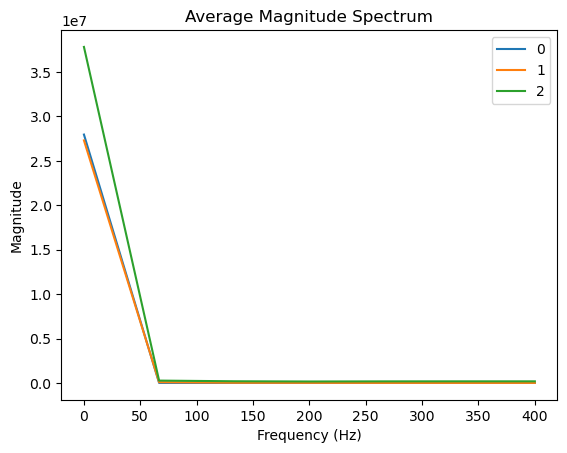

In [40]:
# Initialize an empty array to store the FFT results
fft_results_0 = []
fft_results_1 = []
fft_results_2 = []

fs = 1000  # Sampling frequency in Hz
dt = 1/fs  # Time step in seconds

# Iterate over each row in df_windows_0['IPLA']
for time_series in df_windows_0['IPLA']:
    # Compute the FFT
    fft_result = np.fft.fft(time_series)
    # Append the FFT result to the array
    fft_results_0.append(fft_result)

# Iterate over each row in df_windows_0['IPLA']
for time_series in df_windows_1['IPLA']:
    # Compute the FFT
    fft_result = np.fft.fft(time_series)
    # Append the FFT result to the array
    fft_results_1.append(fft_result)

# Iterate over each row in df_windows_0['IPLA']
for time_series in df_windows_2['IPLA']:
    # Compute the FFT
    fft_result = np.fft.fft(time_series)
    # Append the FFT result to the array
    fft_results_2.append(fft_result)

# Convert the array to a numpy array
fft_results_0 = np.array(fft_results_0)
fft_results_1 = np.array(fft_results_1)
fft_results_2 = np.array(fft_results_2)


# Compute the average FFT over all the rows
average_fft_0 = np.mean(fft_results_0, axis=0)
average_fft_1 = np.mean(fft_results_1, axis=0)
average_fft_2 = np.mean(fft_results_2, axis=0)

# Compute the magnitude spectrum of the average FFT
magnitude_spectrum_0 = np.abs(average_fft_0)
magnitude_spectrum_1 = np.abs(average_fft_1)
magnitude_spectrum_2 = np.abs(average_fft_2)

# Compute the frequency bins
freq_bins = np.fft.fftfreq(len(time_series), d=dt)


# Plot the average magnitude spectrum
plt.plot(freq_bins[:len(time_series)//2], magnitude_spectrum_0[:len(time_series)//2], label='0')
plt.plot(freq_bins[:len(time_series)//2], magnitude_spectrum_1[:len(time_series)//2], label='1')
plt.plot(freq_bins[:len(time_series)//2], magnitude_spectrum_2[:len(time_series)//2], label='2')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Average Magnitude Spectrum')
plt.legend()


We see that there is a significant difference in the low frequencies which might help the model

### Low Frequencies

Plot of the low frequencies obtained from Fast Fourier Transform.

C:\Users\ricca\AppData\Local\Temp\ipykernel_13232\3288563967.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_windows_0_group_mean = df_windows_0_group.mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_13232\3288563967.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_windows_1_group_mean = df_windows_1_group.mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_13232\3288563967.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be vali

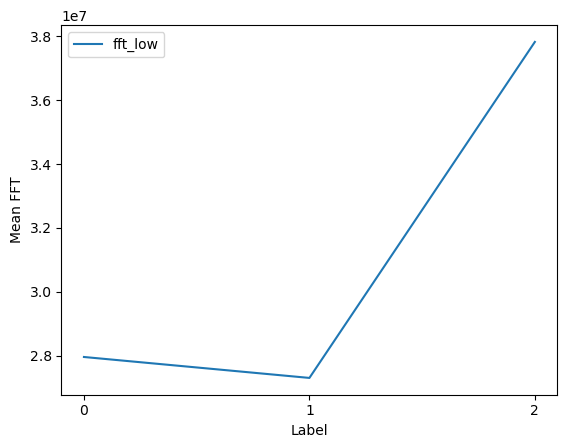

In [41]:
# plot the fft per group of label,
# take the mean of the fft per group of label
df_windows_0_group = df_windows_0.groupby('label')
df_windows_1_group = df_windows_1.groupby('label')
df_windows_2_group = df_windows_2.groupby('label')

df_windows_0_group_mean = df_windows_0_group.mean()
df_windows_1_group_mean = df_windows_1_group.mean()
df_windows_2_group_mean = df_windows_2_group.mean()

y = [df_windows_0_group_mean['fft_low'].to_numpy()[0], df_windows_1_group_mean['fft_low'].to_numpy()[0], df_windows_2_group_mean['fft_low'].to_numpy()[0]]

# plot the data
plt.plot(['0', '1', '2'], y, label='fft_low')
plt.xlabel('Label')
plt.ylabel('Mean FFT')
plt.legend()
plt.show()


We see a significant difference from Frequencies depending on the event type

## IPLA

In [22]:
ipa1  = np.mean(df_windows_0['IPLA'],axis=0)
ipa2 = np.mean(df_windows_1['IPLA'],axis=0)
ipa3 = np.mean(df_windows_2['IPLA'],axis=0)

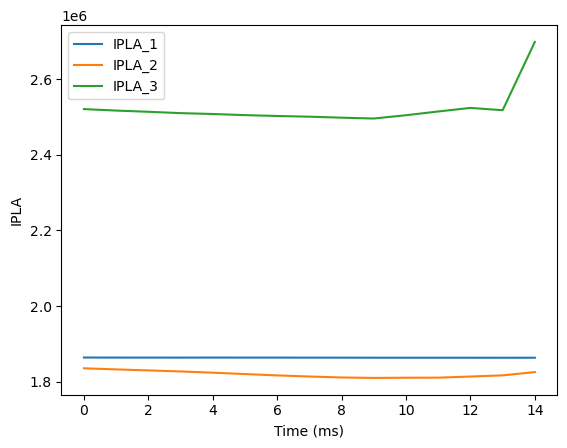

In [24]:
plt.plot(ipa1, label='IPLA_1')
plt.plot(ipa2, label='IPLA_2')
plt.plot(ipa3, label='IPLA_3')
plt.xlabel('Time (ms)')
plt.ylabel('IPLA')
plt.legend()

## ECE

### ECE mean

In [25]:

ece_0  = np.mean(df_windows_0['ECEcore'],axis=0)
ece_1 = np.mean(df_windows_1['ECEcore'],axis=0)
ece_2 = np.mean(df_windows_2['ECEcore'],axis=0)

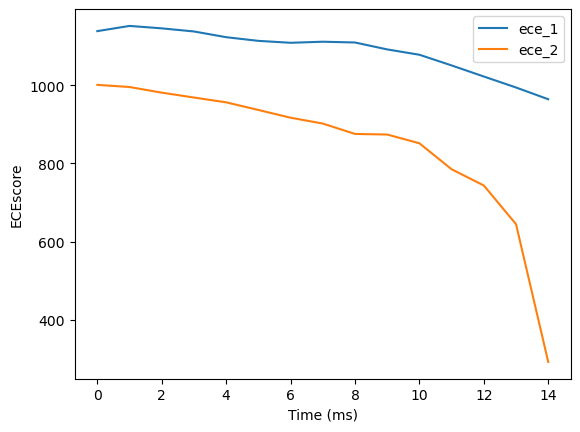

In [26]:
#plot ece_0
#plt.plot(ece_0, label='ece_0') #Plotting the ECEscore for label 0 collapses the scale of the ECE 1 and 2, uncomment the line to see
plt.plot(ece_1, label='ece_1')
plt.plot(ece_2, label='ece_2')
plt.xlabel('Time (ms)')
plt.ylabel('ECEscore')
plt.legend()


### ECE first derivative at the frame 13-14(dx1) and 14-15(dx2)

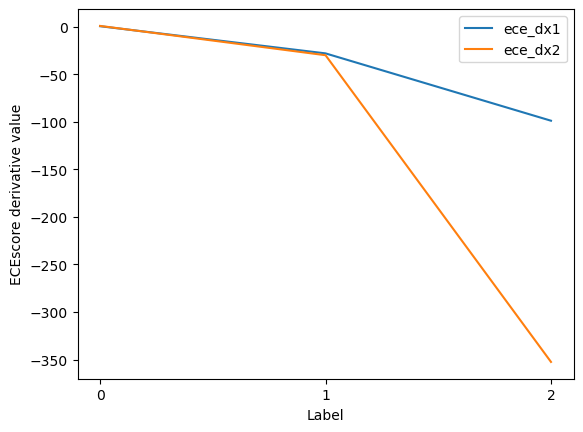

In [30]:
ece_0  = np.mean(df_windows_0['ECEcore_dx1'],axis=0)
ece_1 = np.mean(df_windows_1['ECEcore_dx1'],axis=0)
ece_2 = np.mean(df_windows_2['ECEcore_dx1'],axis=0)

ece_0_dx2 =  np.mean(df_windows_0['ECEcore_dx2'],axis=0)
ece_1_dx2 = np.mean(df_windows_1['ECEcore_dx2'],axis=0)
ece_2_dx2 = np.mean(df_windows_2['ECEcore_dx2'],axis=0)

plt.plot(['0','1','2'],[ece_0, ece_1, ece_2], label='ece_dx1')
plt.plot(['0','1','2'],[ece_0_dx2, ece_1_dx2, ece_2_dx2], label='ece_dx2')
plt.xlabel('Label')
plt.ylabel('ECEscore derivative value')
plt.legend()


## ZMAG

In [31]:
zmag1  = np.mean(df_windows_0['ZMAG'],axis=0)
zmag2 = np.mean(df_windows_1['ZMAG'],axis=0)
zmag3 = np.mean(df_windows_2['ZMAG'],axis=0)


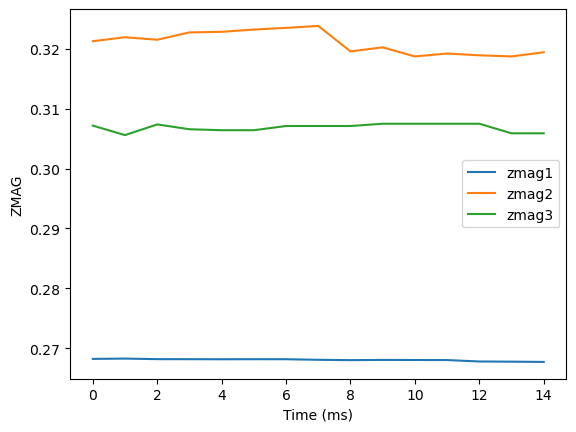

In [33]:
plt.plot(zmag1, label='zmag1')
plt.plot(zmag2, label='zmag2')
plt.plot(zmag3, label='zmag3')
plt.xlabel('Time (ms)')
plt.ylabel('ZMAG')
plt.legend()


## LI

In [34]:
li1  = np.mean(df_windows_0['LI'],axis=0)
li2 = np.mean(df_windows_1['LI'],axis=0)
li3 = np.mean(df_windows_2['LI'],axis=0)


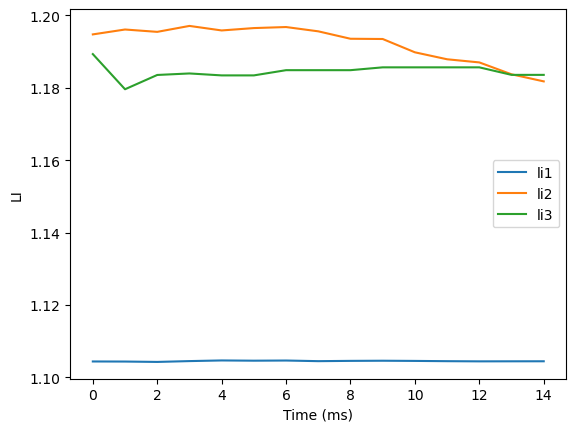

In [36]:
plt.plot(li1, label='li1')
plt.plot(li2, label='li2')
plt.plot(li3, label='li3')
plt.xlabel('Time (ms)')
plt.ylabel('LI')
plt.legend()

## Distance

In [37]:
di1  = np.mean(df_windows_0['distances'],axis=0)
di2 = np.mean(df_windows_1['distances'],axis=0)
di3 = np.mean(df_windows_2['distances'],axis=0)

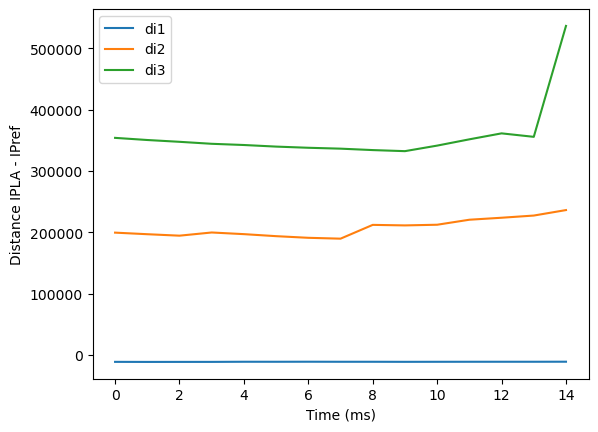

In [39]:
plt.plot(di1, label='di1')
plt.plot(di2, label='di2')
plt.plot(di3, label='di3')
plt.xlabel('Time (ms)')
plt.ylabel('Distance IPLA - IPref')
plt.legend()

# MODELS  

### Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.svm import SVC


## Data Preparation

### Data Loading

In [43]:
#load df_windows_2
df_windows_2 = pd.read_csv('../data/df_windows_2.csv')
df_windows_2.head(5)
#we take shot 94658

,distances,distance_mean,minor_events,ECEcore,ECEcore_mean,ECEcore_dx1,ECEcore_dx2,ZMAG,ZMAG_mean,LI,LI_mean,IPLA,fft_low,shot,label,window,IPLA_dx1,IPLA_dx2,IPLA_dx3,IPLA_ddx,IPLA_1,IPLA_2,IPLA_3,IPLA_4,IPLA_mean,time_window,Vloop_1,Vloop_2,Vloop_3,Vloop_4
0,[ 47251.75 38434.25 31351.5 14218.75 ...,-2.542913e+04,2.0,[442.6914 466.4399 467.32544 491.09518 4...,437.04056,-409.736050,-12.706875,[0.28965047 0.24660058 0.24660058 0.24660058 0...,0.249471,[1.0385356 0.7620407 0.7620407 0.7620407 0.762...,0.780474,[2748872.2 2739139.2 2732056.5 2714054. 27021...,4.009517e+07,94658,2,850,-33313.00,-11462.000,51015.000,62477.00,2645608.2,2672758.2,2663232.5,2687322.8,2673011.2,8.999,8.093350,-8.550330,-4.743373,4.453879
1,[ 47251.75 38434.25 31351.5 14218.75 ...,-2.542913e+04,7.0,[442.6914 466.4399 467.32544 491.09518 4...,437.04053,-409.736050,-12.706875,[0.28965047 0.24660058 0.24660058 0.24660058 0...,0.249471,[1.0385356 0.7620407 0.7620407 0.7620407 0.762...,0.780474,[2748872.2 2739139.2 2732056.5 2714054. 27021...,4.009517e+07,94658,2,851,-33313.00,-11462.000,51015.000,62477.00,2645608.2,2672758.2,2663232.5,2687322.8,2673011.2,8.999,8.093350,-8.550330,-4.743373,4.453879
2,[-13557.75 -19015.75 -15703.5 -18599. -1608...,-3.049283e+03,8.0,[711.4786 696.3585 692.65765 688.9189 ...,471.37152,14.805653,-34.474680,[0.21888992 0.21282274 0.21282274 0.21282274 0...,0.237389,[1.3111607 1.3104417 1.3104417 1.3104417 1.310...,0.957145,[2249613.2 2244155.2 2246590. 2243694.5 22452...,3.385425e+07,95467,2,852,-18829.75,7303.750,365825.500,358521.75,2572907.0,2241136.5,2241272.2,2244817.8,2256949.5,16.837,129.666210,-2.048448,-2.206113,-0.397870
3,[-13557.75 -19015.75 -15703.5 -18599. -1608...,-3.049283e+03,13.0,[711.4786 696.3585 692.65765 688.9189 ...,488.53696,14.805653,-34.474680,[0.21888992 0.21282274 0.21282274 0.21282274 0...,0.231349,[1.3111607 1.3104417 1.3104417 1.3104417 1.310...,1.045482,[2249613.2 2244155.2 2246590. 2243694.5 22452...,3.385425e+07,95467,2,853,-18829.75,7303.750,365825.500,358521.75,2572907.0,2241136.5,2241272.2,2244817.8,2256949.5,16.837,129.666210,-2.048448,-2.206113,-0.397870
4,[1167629.25 1164927.5 1162933.5 1162276.6...,1.188487e+06,5.0,[892.6609 855.2241 858.839 858.839 863.1...,547.19696,-197.033600,-228.806060,[0.05448151 0.05448151 0.05448151 0.05448151 0...,0.197197,[1.3508625 1.3508625 1.3508625 1.3508625 1.350...,1.105229,[1167629.2 1164927.5 1162933.5 1162276.6 11610...,1.782730e+07,96292,2,854,145151.38,10550.625,3641.625,-6909.00,1312420.6,1155192.2,1156463.6,1160106.0,1188486.6,22.959,49.323544,19.165404,-0.235757,0.360215


In [46]:
#load df_windows
df_windows = pd.read_csv('../data/df_windows.csv')

In [47]:
df_windows.shape
len(np.unique(df_windows['shot']))

136

In [48]:
#drop column IPLA, Distances, Shot, window, time_window
data = df_windows.drop(columns=['IPLA','ECEcore','ZMAG','LI', 'distances', 'window', 'time_window'])
#create data_val that takes the 2 shots
#data_val = data[data['shot'] == 81206]
#data_val = data[data['shot'] == 94658]
data_val = data[data['shot'] == 95467]
#take 2 shots out of data
#data = data[data['shot'] != 81206]
#data = data[data['shot'] != 94658]
data = data[data['shot'] != 95467]
data.head(5)

#do the same for 95467


,distance_mean,minor_events,ECEcore_mean,ECEcore_dx1,ECEcore_dx2,ZMAG_mean,LI_mean,fft_low,shot,label,IPLA_dx1,IPLA_dx2,IPLA_dx3,IPLA_ddx,IPLA_1,IPLA_2,IPLA_3,IPLA_4,IPLA_mean,Vloop_1,Vloop_2,Vloop_3,Vloop_4
0,-56307.483333,0.0,2822.7430,6.463867,-0.354248,0.342851,1.150685,2.885532e+07,81206,0,1748.8750,387.500,-1943.1250,-2330.6250,1922563.1,1924126.80,1922741.80,1923580.8,1923687.9,-1.036661,-2.111309,-1.613139,-0.717432
1,-47580.700000,0.0,2389.0764,14.115967,-14.139160,0.349049,1.202238,2.927879e+07,81206,0,466.1250,476.875,-2715.2500,-3192.1250,1951248.2,1952237.00,1952226.20,1950999.0,1951919.2,-3.662136,-1.286469,-1.223850,-1.472519
2,-10166.108333,0.0,2182.8489,11.359497,4.013428,0.333993,1.198655,2.984001e+07,81206,0,70.1250,-1161.875,367.3750,1529.2500,1988619.6,1987009.50,1989410.00,1989018.2,1989334.0,-0.956687,-0.584253,-1.086478,-0.400202
3,-30771.841667,0.0,2093.3047,16.383667,0.000000,0.314684,1.185835,2.953092e+07,81206,0,494.8750,-243.000,-299.6250,-56.6250,1969271.8,1968408.60,1969010.90,1967915.2,1968728.4,-0.877379,-0.743979,-0.696189,-1.513505
4,64155.254167,0.0,2021.7370,0.000000,0.000000,0.291258,1.315469,9.361791e+06,81206,0,-63.4375,2663.875,-3095.3125,-5759.1875,622110.1,623452.44,624908.25,624267.8,624119.3,1.871721,1.500065,0.527328,0.995674


In [50]:
#split data into training and testing, 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(data, data['label'], test_size=0.2, random_state=42)

#drop label column from X_train and X_test
X_train = X_train.drop(columns=['label','shot'])
X_test = X_test.drop(columns=['label','shot'])


## SVM

### Choosing the kernel

In [264]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = make_pipeline(StandardScaler(), svm.SVC(kernel=kernel, class_weight='balanced'))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(kernel)
    print(accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average='macro'))
    print(classification_report(y_test, y_pred))



linear
0.9661016949152542
0.9140826873385013
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       0.87      0.97      0.92        34
           2       0.91      0.77      0.83        13

    accuracy                           0.97       177
   macro avg       0.93      0.91      0.91       177
weighted avg       0.97      0.97      0.97       177

poly
0.9378531073446328
0.8758625397881946
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       130
           1       0.85      0.82      0.84        34
           2       1.00      0.69      0.82        13

    accuracy                           0.94       177
   macro avg       0.93      0.84      0.88       177
weighted avg       0.94      0.94      0.94       177

rbf
0.9491525423728814
0.835647964166936
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130


We see that Linear has the best results so we decide to go with the linear kernel for hyperparameter tuning. Linear kernel also offers feature importance variables to easily plot which features matter (not avaible for RBF for example).

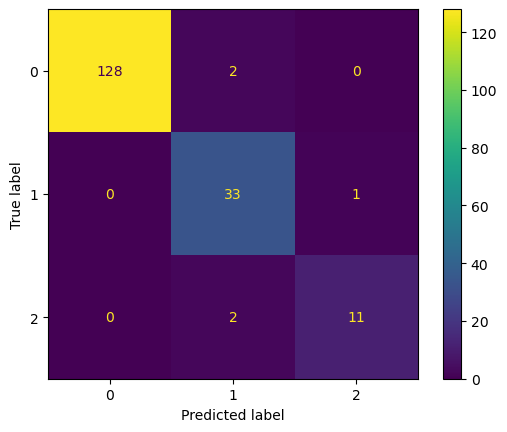

In [51]:
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', class_weight='balanced'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()


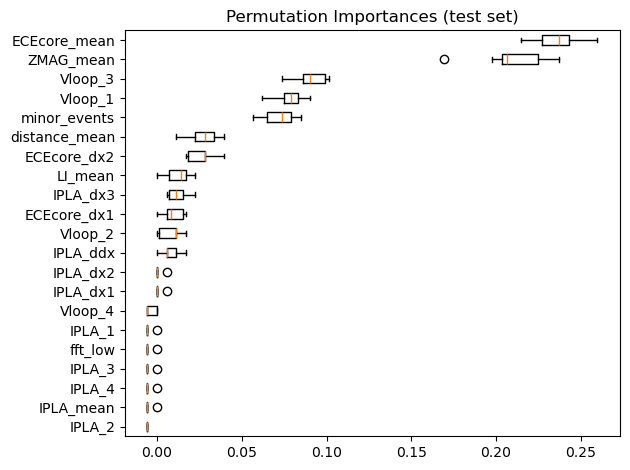

### Linear SVM optimization with hyperparameter tuning

In [54]:
#perform an optimized SVM linear with scaler and weight balancing and cross validation
# Create a df X which contains all data columns except for the Cell_Type column
X = data.drop(columns=['label','shot'])

# Create a df y which contains only the label column
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a parameter grid
param_grid = {'svc__C': [10,20,30,40,50,55],
              'svc__gamma': [0.001,0.0009,0.002]}

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', random_state=42))])

# Create a stratified k-fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=skf, return_train_score=True)

# Fit the grid search
grid.fit(X_train, y_train)


# View the best parameters and score
print('Best C:', grid.best_estimator_.get_params()['svc__C'])
print('Best gamma:', grid.best_estimator_.get_params()['svc__gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['svc__kernel'])
print('Best score:', grid.best_score_)
print('Best estimator:', grid.best_estimator_)

# View the best estimator
best_svm_model = grid.best_estimator_

# Predict the target value
y_pred = best_svm_model.predict(X_test)

# View the classification report
print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred,average='weighted')}")


Best C: 10
Best gamma: 0.001
Best kernel: linear
Best score: 0.9872640095894516
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=10, gamma=0.001, kernel='linear', random_state=42))])
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       0.92      0.97      0.94        34
           2       0.92      0.92      0.92        13

    accuracy                           0.98       177
   macro avg       0.95      0.96      0.95       177
weighted avg       0.98      0.98      0.98       177

ACCURACY : 0.9774011299435028
F1 SCORE 0.9776801746845105


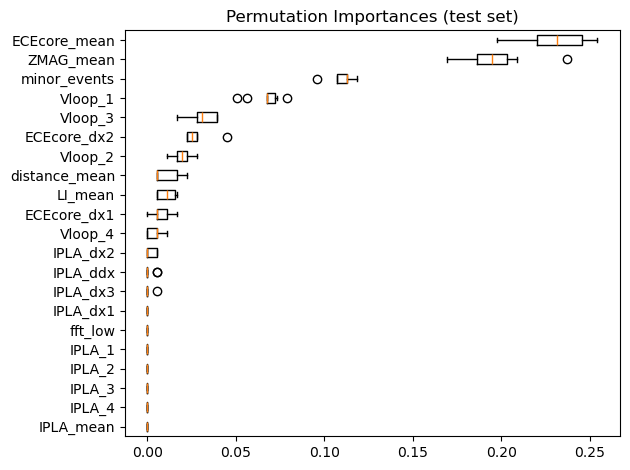

In [55]:
#measure feature importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### Overfitting analysis

We see that the difference between training accuracy and test accuracy is not enough to justify overfitting. The model seems to be performing well on Train and Test without overfitting

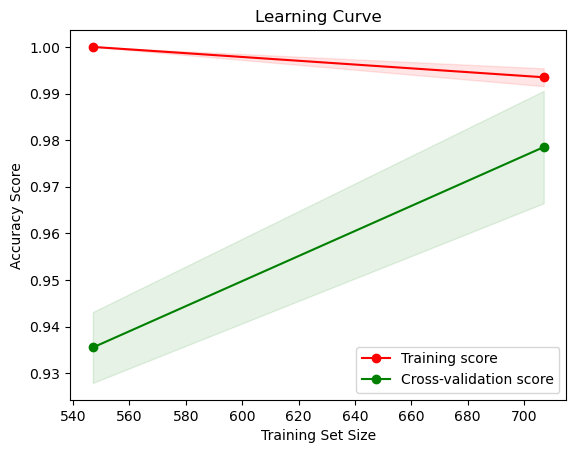

Best training score: 0.9954019825510491
Best cross-validation score: 0.9872640095894516


In [56]:
train_sizes, train_scores, test_scores = learning_curve(
    grid.best_estimator_, X, y, cv=skf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="g", alpha=0.1)

# Plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")

plt.show()
cv_results = grid.cv_results_
mean_train_score = cv_results['mean_train_score'][grid.best_index_]
mean_cv_score = cv_results['mean_test_score'][grid.best_index_]

print('Best training score:', mean_train_score)
print('Best cross-validation score:', mean_cv_score)

### Test on a validation shot, isolated from the train and test

In [57]:
X_val = data_val.drop(columns=['label','shot'])
y_val = data_val['label']
y_pred = best_svm_model.predict(X_val)

print(classification_report(y_val, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_val, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_val, y_pred,average='macro')}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

ACCURACY : 1.0
F1 SCORE 1.0


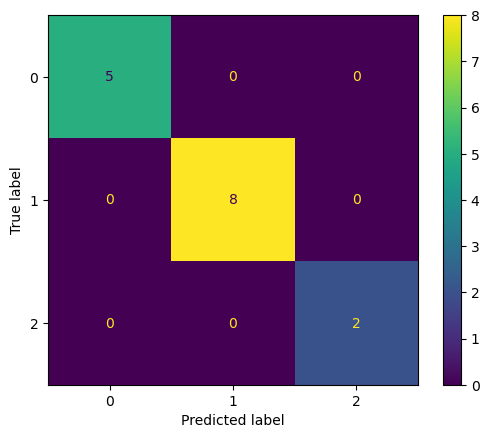

In [58]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()


## PCA
ca marche pas trop

Shape of PCA features: (884, 4)
Explained variance ratio: [0.33752598 0.18759177 0.10899077 0.08629763]


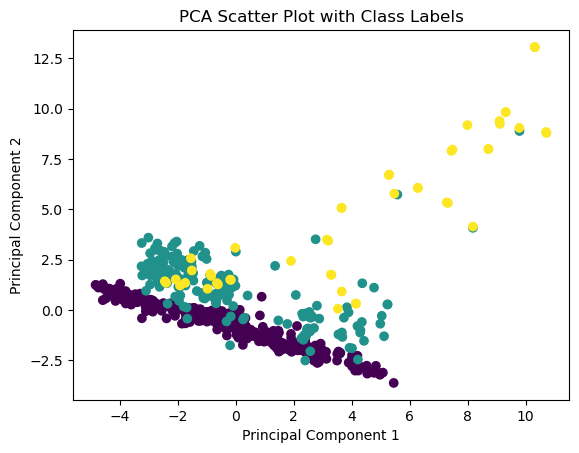

In [ ]:
# Create a PCA model with 4 components: pca
pca = PCA(n_components=4)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the PCA instance to the scaled samples
pca.fit(X_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X_scaled)

# Print the shape of pca_features
print("Shape of PCA features:", pca_features.shape)

# Print the ratio of variance explained by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the PCA results with class labels
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot with Class Labels")
plt.show()



In [184]:
#perform an optimized SVM linear with scaler and weight balancing and cross validation

# Create a df X which contains all data columns except for the Cell_Type column
X = data.drop(columns=['label','shot'])
X = pca.transform(X)
# Create a df y which contains only the label column
y = data['label']

# Create a parameter grid
param_grid = {'svc__C': [10,20,30,40,50,55],
              'svc__gamma': [0.001,0.0009,0.002]}

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', random_state=42))])

# Create a stratified k-fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=skf, return_train_score=True)

# Fit the grid search
grid.fit(X, y)


# View the best parameters and score
print('Best C:', grid.best_estimator_.get_params()['svc__C'])
print('Best gamma:', grid.best_estimator_.get_params()['svc__gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['svc__kernel'])
print('Best score:', grid.best_score_)
print('Best estimator:', grid.best_estimator_)

# View the best estimator
best_model = grid.best_estimator_

# Predict the target value
y_pred = best_model.predict(X)

# View the classification report
print(classification_report(y, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y, y_pred,average='weighted')}")


c:\Users\ricca\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Best C: 20
Best gamma: 0.001
Best kernel: linear
Best score: 0.7997817154596816
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=20, gamma=0.001, kernel='linear', random_state=42))])
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       637
           1       0.93      0.25      0.40       199
           2       0.91      0.44      0.59        48

    accuracy                           0.80       884
   macro avg       0.88      0.56      0.62       884
weighted avg       0.83      0.80      0.76       884

ACCURACY : 0.7997737556561086
F1 SCORE 0.7558542380305528


## Random Forest


### Trial run

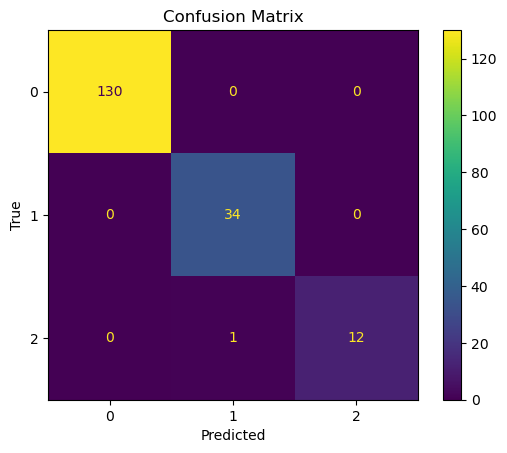

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()


The model performs even better than Linear SVM without hyperparameter tuning, we thus investigate further.

### RF hyperparameter tuning

In [274]:
# Split the dataset into training and testing sets (we'll use Stratified K-Fold for cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [500, 1000],  # Number of trees in the forest
    'max_depth': [2, 10, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Stratified K-Fold cross-validator (you can adjust the number of folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and estimator
best_rf_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best classifier on the entire training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy to evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Best Hyperparameters:", best_params)


Accuracy: 0.9943502824858758
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


Accuracy: 0.9943502824858758

Best Hyperparameters: 
- 'max_depth': 10
- 'min_samples_leaf': 1
- 'min_samples_split': 2
- 'n_estimators': 1000

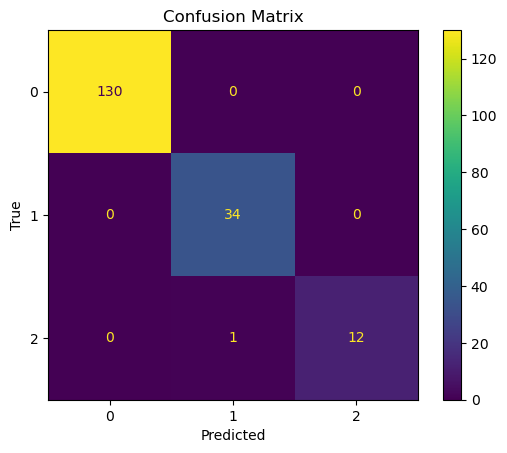

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.97      1.00      0.99        34
           2       1.00      0.92      0.96        13

    accuracy                           0.99       177
   macro avg       0.99      0.97      0.98       177
weighted avg       0.99      0.99      0.99       177

ACCURACY : 0.9943502824858758
F1 SCORE 0.9942782281175796


In [46]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42,max_depth=10,min_samples_leaf=1,min_samples_split=2)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred,average='weighted')}")


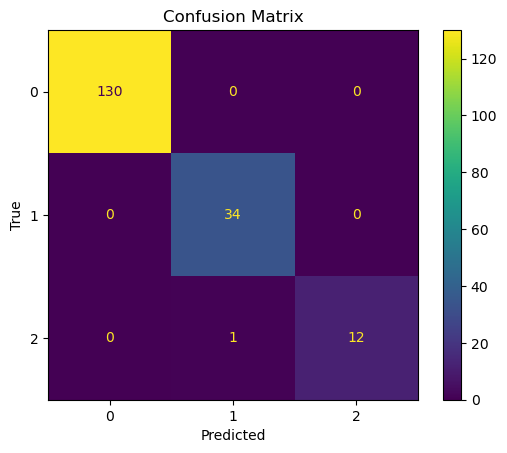

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.97      1.00      0.99        34
           2       1.00      0.92      0.96        13

    accuracy                           0.99       177
   macro avg       0.99      0.97      0.98       177
weighted avg       0.99      0.99      0.99       177

ACCURACY : 0.9943502824858758
F1 SCORE 0.9942782281175796


In [45]:
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()
print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred,average='weighted')}")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

ACCURACY : 1.0
F1 SCORE 1.0


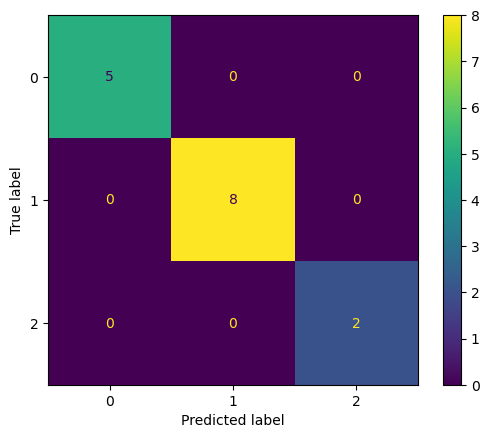

In [279]:

X_val = data_val.drop(columns=['label','shot'])
y_val = data_val['label']
y_pred = best_rf_classifier.predict(X_val)

print(classification_report(y_val, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_val, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_val, y_pred,average='macro')}")
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
